# 3- Temel Bileşen Regresyonu / Principal Component Regression (PCR) - Alıştırmalar

## ALIŞTIRMA - 1

### Verisetinin İncelenmesi ve Manipüle Edilmesi

In [1]:
# Gerekli kütüphanelerin dahil edilmesi,
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

* Verisetini [buradan](https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/FuelConsumption.csv) indirebilirsiniz.

In [2]:
url = "https://mrkizmaz-s3data.s3.eu-west-1.amazonaws.com/DataSets/FuelConsumption.csv"

fuelcons = pd.read_csv(url)
df = fuelcons.copy()
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
df.isnull().values.any() # verisetinde bos degerler var mı?

False

In [4]:
df.info() # verisetinin bilgi cıktısını verir

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
# modelyear veriseti bilgisinde int olarak görünüyor, aslında datetime olması gerekir.
df["MODELYEAR"] = pd.to_datetime(df["MODELYEAR"]) 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   MODELYEAR                 1067 non-null   datetime64[ns]
 1   MAKE                      1067 non-null   object        
 2   MODEL                     1067 non-null   object        
 3   VEHICLECLASS              1067 non-null   object        
 4   ENGINESIZE                1067 non-null   float64       
 5   CYLINDERS                 1067 non-null   int64         
 6   TRANSMISSION              1067 non-null   object        
 7   FUELTYPE                  1067 non-null   object        
 8   FUELCONSUMPTION_CITY      1067 non-null   float64       
 9   FUELCONSUMPTION_HWY       1067 non-null   float64       
 10  FUELCONSUMPTION_COMB      1067 non-null   float64       
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64         
 12  CO2EMISSIONS        

In [7]:
df.nunique() # her sütun icin eşsiz degerlerin sayısı

MODELYEAR                     1
MAKE                         39
MODEL                       663
VEHICLECLASS                 16
ENGINESIZE                   45
CYLINDERS                     7
TRANSMISSION                 22
FUELTYPE                      4
FUELCONSUMPTION_CITY        167
FUELCONSUMPTION_HWY         118
FUELCONSUMPTION_COMB        148
FUELCONSUMPTION_COMB_MPG     43
CO2EMISSIONS                159
dtype: int64

In [8]:
df.FUELTYPE.value_counts() # fueltype sütunundaki sınıflar

X    514
Z    434
E     92
D     27
Name: FUELTYPE, dtype: int64

In [9]:
df.describe().T # verisetinin dagılımı hakkında bilgi verir.

,count,mean,std,min,25%,50%,75%,max
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [10]:
df.corr() # verisetinin degiskenleri arasındaki korelasyon durumu

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


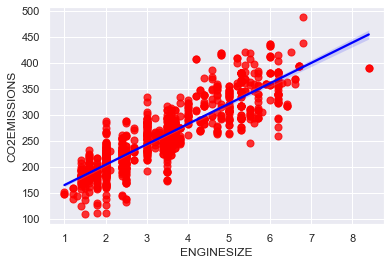

In [11]:
# enginesize ve co2emission görsel durumu
sns.set_theme(color_codes = True)
sns.regplot(data = df, x = 'ENGINESIZE', y = 'CO2EMISSIONS', color = 'blue', scatter_kws = {'s': 50, 'color' : 'red'});

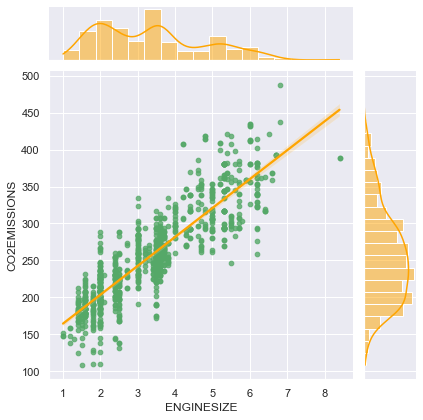

In [12]:
sns.jointplot(data = df, x = 'ENGINESIZE', y = 'CO2EMISSIONS', kind = 'reg', color = 'orange', scatter_kws = {'color': 'g', 's':22});

### Model Kurulumu

In [13]:
df1 = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS']] # sürekli degiskenler
df1.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,33,196
1,2.4,4,11.2,7.7,9.6,29,221
2,1.5,4,6.0,5.8,5.9,48,136
3,3.5,6,12.7,9.1,11.1,25,255
4,3.5,6,12.1,8.7,10.6,27,244


In [14]:
df1.corr() # aralarındaki korelasyon

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


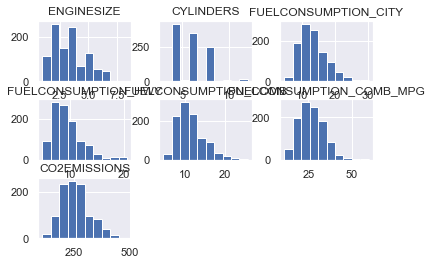

In [15]:
# dagılımları
df1.hist()
plt.show();

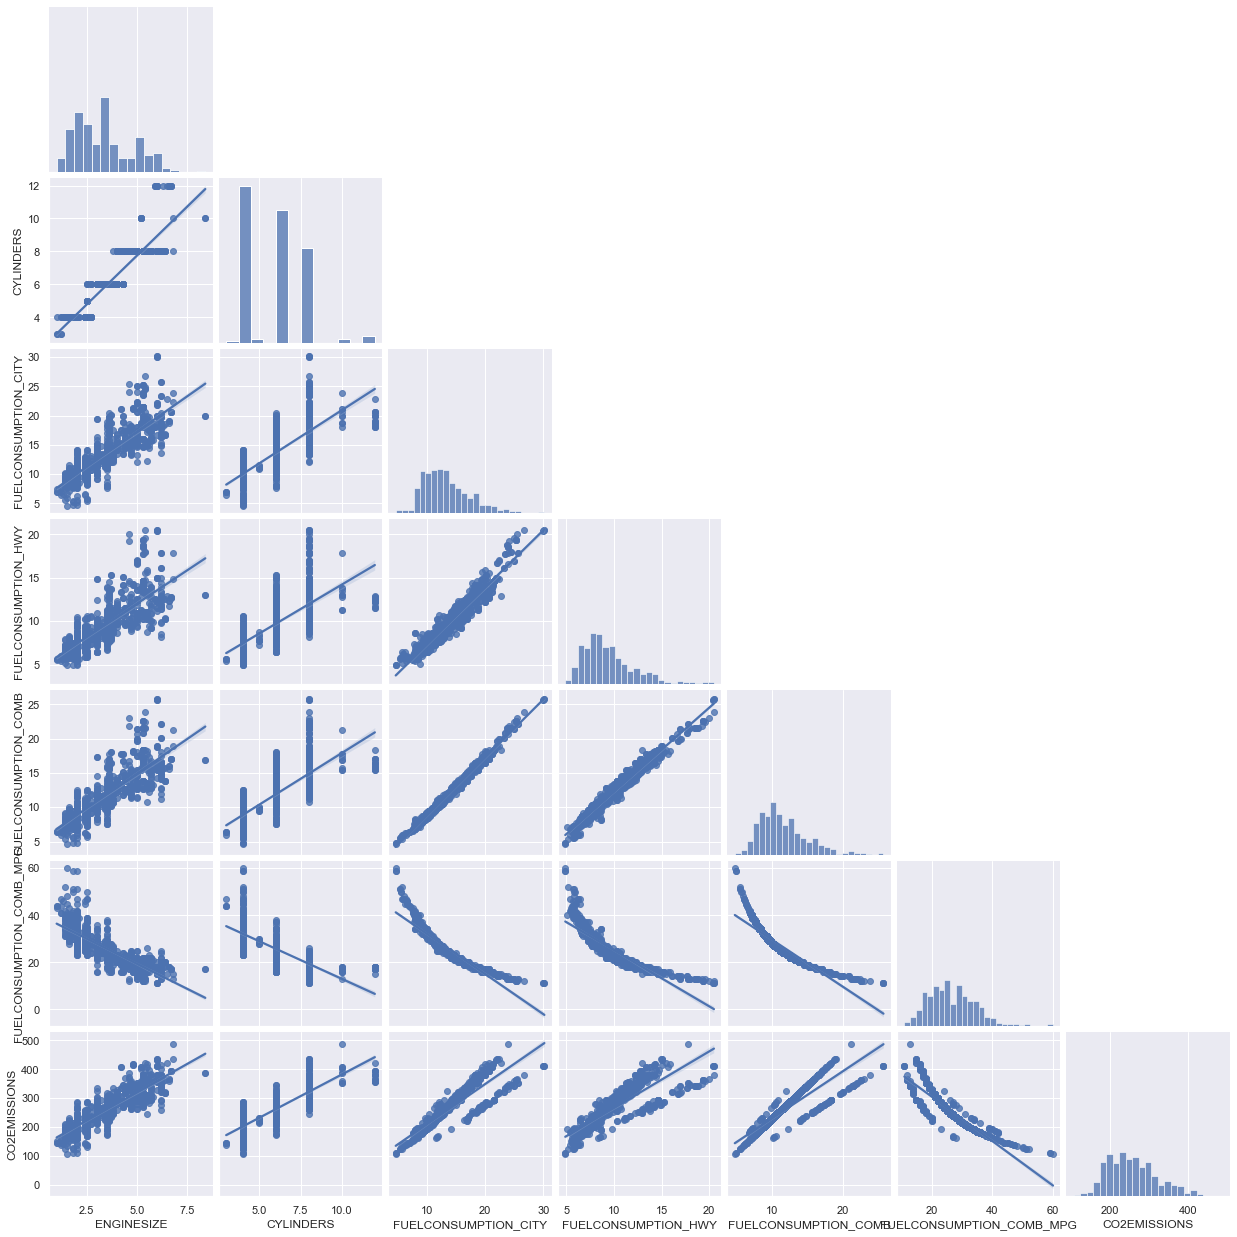

In [16]:
sns.pairplot(data = df1, corner = True, kind = 'reg');

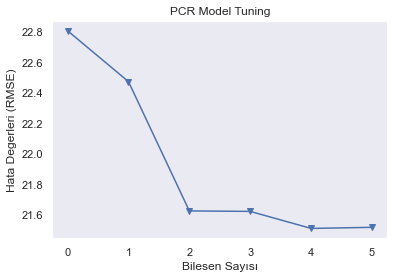

In [17]:
X = df1.iloc[:, :-1] # bagımsız degiskenler (Co2emissions haric)
y = df1['CO2EMISSIONS'] # bagımlı degisken

# %80 egitim, %20 test seti
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.20,
                                                   random_state = 42)

pca = PCA() # degisken sayısı kadar bilesen olusuturur

X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.fit_transform(scale(X_test))

# model nesnesinin olusturulması ve fit edilmesi
lm = LinearRegression()
model = lm.fit(X_reduced_train, y_train)

# 10 katlı Cross Validation ile dogrulama,
cv10 = model_selection.KFold(n_splits = 10, shuffle = True, random_state = 1)

# hataların elde edilmesi,
RMSE = []
for i in np.arange(1, X_reduced_train.shape[1] + 1):
    score = np.sqrt(-1 * model_selection.cross_val_score(lm,
                                                    X_reduced_train[:, :i],
                                                    y_train.ravel(),
                                                    cv = cv10,
                                                    scoring = 'neg_mean_squared_error').mean())
    RMSE.append(score)
    
# hata degerlerinin görsellestirilmesi
plt.plot(RMSE, '-v')
plt.xlabel('Bilesen Sayısı')
plt.ylabel('Hata Degerleri (RMSE)')
plt.title('PCR Model Tuning')
plt.grid();

In [18]:
RMSE # elde edilen hata degerleri

[22.805712927983365,
 22.472876565610434,
 21.62657423834361,
 21.623416985627586,
 21.51203259544392,
 21.519197618114255]

In [19]:
min(RMSE) # optimum hata degeri

21.51203259544392

In [20]:
rscore = model.score(X_reduced_train, y_train)

In [21]:
rscore # modelin anlamlılık degeri

0.885359789939373

In [22]:
print(f"Modelin basarı yüzdesi: {rscore * 100} \nCross Validation yöntemi ile elde edilen optimum hata degeri: {min(RMSE)}")

Modelin basarı yüzdesi: 88.5359789939373 
Cross Validation yöntemi ile elde edilen optimum hata degeri: 21.51203259544392


### Sonuç

PCR ile elde edilen hata degeri,
* Cross Validation yöntemi ile elde edilen optimum hata degeri: **21.51203259544392**